<a href="https://colab.research.google.com/github/ValentineFil/University/blob/main/%D0%9F%D1%80%D0%BE%D1%81%D1%82%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%9F%D0%BE%D1%81%D0%B5%D0%BD%D0%B8%D1%86%D0%BA%D0%B8%D0%B9_%D0%9F%D0%9C19_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Для начала работы обратимся к набору данных pima-indian-diabetes. Это довольно известный датасет, собравший информацию о медицинских показателях порядка 700 пациентов, обследованных на предмет наличия сахарного диабета. На нем мы потренируемся строить классификационные модели. 


In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=None, names=col_names)
pima = pd.read_csv("diabetes.csv")
pima.rename(columns={'Outcome': 'label'}, inplace=True)
pima = pima.astype({"label": "int"})
pima = pima[1:]

При проведении серьезного анализа перед построением модели машинного обучения нужно провести тщательную обработку и очистку набора данных - удаление пропущенных значений, анализ шкал, нормализация, удаление выбросов и аномалий. Используемый нами набор - сам по себе довольно чистый, потому в учебных целях пропустим этот шаг.

Выделим целевую переменную и факторы:


In [ ]:
Y = pima.label
X = pima.drop(['label'], axis=1)

Разделим набор данных на обучающую и тестовую выборки:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=18)

В данном случае мы используем удобную встроенную функцию sklearn для разбиения выборки. Мы используем соотношение 80/20 для обучающей и тестовой выборки. Соотношение может колебаться и зависит от множества факторов, но 80/20 - хорошее значение по умолчанию.

Построим модель логистической регрессии:


In [ ]:
cls = LogisticRegression()

Здесь мы создаем объект классификатора, используя конструктор по умолчанию. Если нам нужно изменить стандартные параметры логистической регрессии (например, задать значение параметра регуляризации), то это можно сделать именно на этом этапе.

Обучим наш классификатор на обучающей выборке:


In [ ]:
cls.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Для оценки эффективности полученной модели сделаем предсказания по нашему классификатору на тестовой выборке (там, где мы уже знаем правильные ответы, чтобы сравнить, насколько предсказания расходятся с действительностью):

In [ ]:
y_pred = cls.predict(x_test)

Оценим эффективность предсказания тестовой выборки при помощи матрицы классификации:

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[94, 17],
       [21, 22]])

Матрица классификации показывает нам очень полезную информацию: совместное распределение числа объектов предсказанных и реальных классов. Рассматривая эту матрицу мы можем получить важную информацию: сколько объектов мы классифицировали правильно, сколько неверно, к каким классам наша модель тяготеет, какие классы распознаются хорошо, какие - плохо.

То же самое в графической форме:


Text(0.5, 15.0, 'Предсказанные значения')

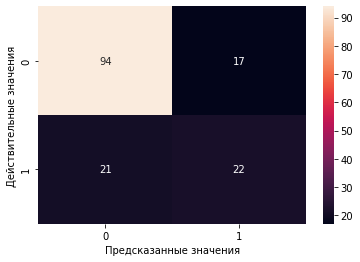

In [ ]:
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

Метрика достоверности предсказания:

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7532467532467533

Метрика точности:

In [ ]:
metrics.precision_score(y_test, y_pred)

0.5641025641025641

Метрика полноты:

In [ ]:
metrics.recall_score(y_test, y_pred)

0.5116279069767442